<a href="https://colab.research.google.com/github/2AMissinou/Metabolomics-Filtering/blob/main/Metabolic_Features_Filtering_BRASSIMET-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='	dodgerblue'> Metabolic features Clean up **<font>

---

Authors: Anani Amegan Missinou (anani.a.missinou@gmail.com) <br>
Input file format: .csv files or .txt files <br>
Outputs: .csv files  <br>
Dependencies: ggplot2, dplyr, ecodist, vegan, svglite\

## Use R and Python code Run rmagic by executing this command %load_ext rpy2. ipython.


1.   Start rmagic by executing this in a cell: %load_ext rpy2. ipython. 
2.   Use %%R to execute cell magic. After that, every time you want to use R, add %%R in the beginning of each cell before code running.

In [1]:
R.version.string
#print(installed.packages())

[1] "R version 4.2.0 (2022-04-22)"

In [ ]:
#installing and calling the necessary packages:
install.packages("ggplot2")
install.packages("dplyr")
install.packages("ecodist") #for PCoA using Bray Curtis distance
install.packages("vegan") #for PermANOVA
install.packages("svglite") # for saving ggplots as svg files

In [ ]:
require("ggplot2")
require("dplyr")
require("ecodist")
require("vegan")
require("svglite")

In [3]:
#nft <- read.csv("220725_disturb_MZmine_POS_MS1-2_NonBlanked_NonGapFilled_4R.csv", header = T, check.names = F)
ft <- read.csv("Brassinet_Roots_Quant_Dec 2021.csv", header = T, check.names = F)
md <- read.csv("Brassinet_Roots_metadata_Dec 2021.csv", header = T, check.names = F)

## Setting a local working directory and creating an automatic result directory:
Works well with Jupyter Notebook. If you are working with Jupyter Notebook, you can simply copy the folder path from your local computer to the next cell output line. It will be set as your working directory <br> 
For ex: D:\User\Project\Test_Data <br>
<br>
For Google Collab, we can upload the necessary files into a new folder using the 'Files' icon on the left and set the folder as working directory. And all the ouput files will be saved here as well and you need to download them finally into your local computer

In [9]:
# Working dierctorycreation and setting of the output
mkdirs <- function(fp) {
    if(!file.exists(fp)) {
        mkdirs(dirname(fp))
        dir.create(fp)
    }
} 

mkdirs("E:/IGEPP-UMR 1349 INRAE/BRASSIMET-project/output_data")
setwd("E:/IGEPP-UMR 1349 INRAE/BRASSIMET-project/output_data")

In [10]:
getwd()

[1] "/content/E:/IGEPP-UMR 1349 INRAE/BRASSIMET-project/output_data"

**<font color='red'> In the following line, enter the required file ID numbers separated by commas. For example as: 1,2,3 </font>**

Lets check if the data has been read correclty!!

In [5]:
head(ft)
dim(ft)

,row ID,row m/z,row retention time,Aviso_232_CuCl2_Block2.mzXML Sample,Aviso_233_CuCl2_Block2.mzXML Sample,Aviso_280_CuCl2_Block3.mzXML Sample,Chifu_187_CuCl2_Block1.mzXML Sample,Chifu_231_CuCl2_Block2.mzXML Sample,Chifu_279_CuCl2_Block3.mzXML Sample,HDEM_186_CuCl2_Block1.mzXML Sample,⋯,PBD17_250_Control _Block3.mzXML Sample,PBD18_160_Control _Block1.mzXML Sample,PBD18_206_Control _Block2.mzXML Sample,PBD18_251_Control _Block3.mzXML Sample,PBD19_207_Control _Block2.mzXML Sample,PBD19_252_Control _Block3.mzXML Sample,PBD19_207_252_Control _Block3.mzXML Sample,PBD20_253_Control _Block3.1.mzXML Sample,PBD20_253_Control _Block3.2.mzXML Sample,PBD20_253_Control _Block3.3.mzXML Sample
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2_Neg,477.065,4.52,0.3120,0.2700,0.2590,0.4220,0.3940,0.3760,0.45900,⋯,0.8030,0.12100,0.3700,0.5680,0.3290,0.6610,0.4950,0.7630,0.7630,0.7630
2,3_Neg,112.986,0.74,0.1770,0.1580,0.1920,0.2660,0.1770,0.2110,0.31900,⋯,0.3660,0.08090,0.2110,0.3040,0.1950,0.3490,0.2720,0.3670,0.3670,0.3670
3,4_Neg,133.014,0.71,0.1050,0.1100,0.1190,0.1020,0.1380,0.1600,0.13500,⋯,0.3300,0.05040,0.1470,0.1770,0.0846,0.2290,0.1570,0.1760,0.1760,0.1760
4,8_Neg,420.046,2.93,0.1250,0.1430,0.1670,0.0121,0.0483,0.0561,0.09240,⋯,0.3320,0.13900,0.4140,0.3140,0.1170,0.0954,0.1060,0.4330,0.4330,0.4330
5,9_Neg,439.085,0.68,0.0111,0.0165,0.0227,0.0149,0.0250,0.0201,0.00984,⋯,0.1110,0.00695,0.0230,0.0280,0.0266,0.0562,0.0414,0.0491,0.0491,0.0491
6,11_Neg,174.956,0.56,0.0369,0.0382,0.0311,0.0531,0.0423,0.0436,0.05550,⋯,0.0704,0.01590,0.0425,0.0536,0.0290,0.0612,0.0451,0.0888,0.0888,0.0888


[1] 3086  141

In [7]:
head(md)
dim(md)

,filename,ATTRIBUTE_accession,ATTRIBUTE_SampleType,ATTRIBUTE_sampleNumber,ATTRIBUTE_treatment,ATTRIBUTE_replicates,ATTRIBUTE_Condition,Accessions,Treatment,Sample_code,⋯,Aviso-PBD16_CuCl2,Aviso-PBD16_H2O,Aviso-PBD17_CuCl2,Aviso-PBD17_H2O,Aviso-PBD18_CuCl2,Aviso-PBD18_H2O,Aviso-PBD19_CuCl2,Aviso-PBD19_H2O,Aviso-PBD20_CuCl2,Aviso-PBD20_H2O
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Aviso_232_CuCl2_Block2.mzXML Sample,Aviso,With_Treatment,232,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_232_CuCl2_B2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
2,Aviso_233_CuCl2_Block2.mzXML Sample,Aviso,With_Treatment,233,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_233_CuCl2_B2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
3,Aviso_280_CuCl2_Block3.mzXML Sample,Aviso,With_Treatment,280,CuCl2,3,CuCl2-induced stress,Aviso,CuCl2,Aviso_280_CuCl2_B3,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
4,Chifu_187_CuCl2_Block1.mzXML Sample,Chifu,With_Treatment,187,CuCl2,1,CuCl2-induced stress,Chifu,CuCl2,Chifu_187_CuCl2_B1,⋯,,,,,,,,,,
5,Chifu_231_CuCl2_Block2.mzXML Sample,Chifu,With_Treatment,231,CuCl2,2,CuCl2-induced stress,Chifu,CuCl2,Chifu_231_CuCl2_B2,⋯,,,,,,,,,,
6,Chifu_279_CuCl2_Block3.mzXML Sample,Chifu,With_Treatment,279,CuCl2,3,CuCl2-induced stress,Chifu,CuCl2,Chifu_279_CuCl2_B3,⋯,,,,,,,,,,


[1] 138  55

Trying to bring the feature table and metadata in the correct format such as the rownames of metadata and column names of feature table are the same. They both are the file names and they need to be same as from now on, we will call the columns in our feature table based on our metadata information. Thus, using the metadata, the user can filter their data easily. You can also directly deal with your feature table without metadata by getting your hands dirty with some coding!! But having a metadata improves the user-experience greatly.

In [8]:
#Removing Peak area extensions
colnames(ft) <- gsub(' Sample','',colnames(ft))
#colnames(nft) <- gsub(' Sample','',colnames(nft))
md$filename<- gsub(' Sample','',md$filename)

#Removing if any NA columns present in the md file
ft <- ft[,colSums(is.na(ft))<nrow(ft)]
#nft <- nft[,colSums(is.na(nft))<nrow(nft)]
md <- md[,colSums(is.na(md))<nrow(md)]

#Changing the row names of the files
rownames(md) <- md$filename
md <- md[,-1]
rownames(ft) <- paste(ft$'row ID',round(ft$'row m/z',digits = 3),round(ft$'row retention time',digits = 3), sep = '_')
#rownames(nft) <- paste(nft$'row ID',round(nft$'row m/z',digits = 3),round(nft$'row retention time',digits = 3), sep = '_')

#Picking only the files with column names containing 'mzML'
ft <- ft[,grep('mzXML',colnames(ft))]
#nft <- nft[,grep('mzML',colnames(nft))]

# Converting replicate attributes into factors (categorical data)
md$ATTRIBUTE_replicates <- as.factor(md$ATTRIBUTE_replicates)

Lets check the files once again!!

In [9]:
head(ft)
dim(ft)

,Aviso_232_CuCl2_Block2.mzXML,Aviso_233_CuCl2_Block2.mzXML,Aviso_280_CuCl2_Block3.mzXML,Chifu_187_CuCl2_Block1.mzXML,Chifu_231_CuCl2_Block2.mzXML,Chifu_279_CuCl2_Block3.mzXML,HDEM_186_CuCl2_Block1.mzXML,HDEM_230_CuCl2_Block2.mzXML,HDEM_278_CuCl2_Block3.mzXML,PBD01_167_CuCl2_Block1.mzXML,⋯,PBD17_250_Control _Block3.mzXML,PBD18_160_Control _Block1.mzXML,PBD18_206_Control _Block2.mzXML,PBD18_251_Control _Block3.mzXML,PBD19_207_Control _Block2.mzXML,PBD19_252_Control _Block3.mzXML,PBD19_207_252_Control _Block3.mzXML,PBD20_253_Control _Block3.1.mzXML,PBD20_253_Control _Block3.2.mzXML,PBD20_253_Control _Block3.3.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2_Neg_477.065_4.52,0.3120,0.2700,0.2590,0.4220,0.3940,0.3760,0.45900,0.36800,0.3360,0.6140,⋯,0.8030,0.12100,0.3700,0.5680,0.3290,0.6610,0.4950,0.7630,0.7630,0.7630
3_Neg_112.986_0.74,0.1770,0.1580,0.1920,0.2660,0.1770,0.2110,0.31900,0.25400,0.1810,0.3640,⋯,0.3660,0.08090,0.2110,0.3040,0.1950,0.3490,0.2720,0.3670,0.3670,0.3670
4_Neg_133.014_0.71,0.1050,0.1100,0.1190,0.1020,0.1380,0.1600,0.13500,0.09830,0.1060,0.1030,⋯,0.3300,0.05040,0.1470,0.1770,0.0846,0.2290,0.1570,0.1760,0.1760,0.1760
8_Neg_420.046_2.93,0.1250,0.1430,0.1670,0.0121,0.0483,0.0561,0.09240,0.09550,0.1320,0.0365,⋯,0.3320,0.13900,0.4140,0.3140,0.1170,0.0954,0.1060,0.4330,0.4330,0.4330
9_Neg_439.085_0.68,0.0111,0.0165,0.0227,0.0149,0.0250,0.0201,0.00984,0.00719,0.0146,0.0264,⋯,0.1110,0.00695,0.0230,0.0280,0.0266,0.0562,0.0414,0.0491,0.0491,0.0491
11_Neg_174.956_0.56,0.0369,0.0382,0.0311,0.0531,0.0423,0.0436,0.05550,0.03960,0.0356,0.0776,⋯,0.0704,0.01590,0.0425,0.0536,0.0290,0.0612,0.0451,0.0888,0.0888,0.0888


[1] 3086  138

In [10]:
head(md)
dim(md)

,ATTRIBUTE_accession,ATTRIBUTE_SampleType,ATTRIBUTE_sampleNumber,ATTRIBUTE_treatment,ATTRIBUTE_replicates,ATTRIBUTE_Condition,Accessions,Treatment,Sample_code,Aviso-H2O_CuCl2,⋯,Aviso-PBD16_CuCl2,Aviso-PBD16_H2O,Aviso-PBD17_CuCl2,Aviso-PBD17_H2O,Aviso-PBD18_CuCl2,Aviso-PBD18_H2O,Aviso-PBD19_CuCl2,Aviso-PBD19_H2O,Aviso-PBD20_CuCl2,Aviso-PBD20_H2O
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Aviso_232_CuCl2_Block2.mzXML,Aviso,With_Treatment,232,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_232_CuCl2_B2,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Aviso_233_CuCl2_Block2.mzXML,Aviso,With_Treatment,233,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_233_CuCl2_B2,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Aviso_280_CuCl2_Block3.mzXML,Aviso,With_Treatment,280,CuCl2,3,CuCl2-induced stress,Aviso,CuCl2,Aviso_280_CuCl2_B3,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Chifu_187_CuCl2_Block1.mzXML,Chifu,With_Treatment,187,CuCl2,1,CuCl2-induced stress,Chifu,CuCl2,Chifu_187_CuCl2_B1,,⋯,,,,,,,,,,
Chifu_231_CuCl2_Block2.mzXML,Chifu,With_Treatment,231,CuCl2,2,CuCl2-induced stress,Chifu,CuCl2,Chifu_231_CuCl2_B2,,⋯,,,,,,,,,,
Chifu_279_CuCl2_Block3.mzXML,Chifu,With_Treatment,279,CuCl2,3,CuCl2-induced stress,Chifu,CuCl2,Chifu_279_CuCl2_B3,,⋯,,,,,,,,,,


[1] 138  54

**About the experiment:**

Background <br>
The BRASSIMET project aims to study the potential for phytochemical defense in lines of interspecific introgression into the Aviso genetic background crossed with different accessions of cabbage or rape (as previouly proposed ([Razzaq et, al., 2022](https://doi.org/10.3390/metabo12060511))). Ideally, we seek to identify chromosomal regions of cabbage and rape that would be likely to extend the chemical defense potential in B. napus. To stimulate the phytochemical responses in a homogeneous way in the different genotypes, we will use a treatment with CuCl2.

1. Plant growth <br>
3 accessions (Aviso, Chiffu, HDEM) previouly analyzed by ([Missinou et al., 2022](https://doi.org/10.1021/acs.jafc.1c08118)) and and  20 lines of introgression were analyzed in three biological replicates (block), each with eight plants per accession. Seeds were germinated in a climate-controlled greenhouse in pots using a mixture of soil and sand (ratio 2:1). Plants were grown in a growth chamber under a daily cycle of 16h/8h in light/dark at 20°C and 18°C, respectively. They were fertilized twice with a half-dosed Hoagland solution. 

2. Cpper treatment  <br>
The plants at the stage 1 month after germination were used to perform copper-stress experiment. Control plant were treated with deionized/distilled water instead of spore suspension. 
Plantes were treated with 5µm Copper at leaves and roots level. The root treatment is carried out in the morning, by depositing 1 mL of solution at the level of the collar of the plants.The foliar treatment is carried out in the morning, by spraying on the leaves so as to cover all the leaves of each plant more or less evenly.
Both groups of plants (control and inoculated) were maintained under controlled conditions.

3. Sample preparation and LC-MS experiment <br>
The sampling is carried out in the morning of the second day after the treatment (48h after treatment). Roots and leaves are sampled separately, pooling the 4 plants from each replicate. The samples are frozen in liquid nitrogen, stored at -80°C in anticipation of lyophilization. The dried tissues were disintegrated by shaking for 60 s with a frequency of 30 Hz using the TissueLyser with grinding jars (10 ml) and stainless-steel grinding balls (Qiagen, Hilden, Germany). Compounds were extracted (with 99/1 MeOH/HOOH) and analytic composition were determined in positive and negative mode. Untargeted metabolomic data were acquired using a UHPLC system (Ultimate 3000 Thermo) coupled to quadrupole time of flight mass spectrometer (Q-Tof Impact II Bruker Daltonics, Bremen, Germany). 

4. Objectives <br>
The goal of the experiment is to identify the chemical defenses induced in copper-treated leaves and roots of lines of introgression that discriminate in particularaly, the "Aviso" genotype.

## Splitting the data into Control and Samples using Metadata:

In [11]:
input_data <- ft

In [12]:
Samples <- ft
head(Samples)
dim(Samples)

,Aviso_232_CuCl2_Block2.mzXML,Aviso_233_CuCl2_Block2.mzXML,Aviso_280_CuCl2_Block3.mzXML,Chifu_187_CuCl2_Block1.mzXML,Chifu_231_CuCl2_Block2.mzXML,Chifu_279_CuCl2_Block3.mzXML,HDEM_186_CuCl2_Block1.mzXML,HDEM_230_CuCl2_Block2.mzXML,HDEM_278_CuCl2_Block3.mzXML,PBD01_167_CuCl2_Block1.mzXML,⋯,PBD17_250_Control _Block3.mzXML,PBD18_160_Control _Block1.mzXML,PBD18_206_Control _Block2.mzXML,PBD18_251_Control _Block3.mzXML,PBD19_207_Control _Block2.mzXML,PBD19_252_Control _Block3.mzXML,PBD19_207_252_Control _Block3.mzXML,PBD20_253_Control _Block3.1.mzXML,PBD20_253_Control _Block3.2.mzXML,PBD20_253_Control _Block3.3.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2_Neg_477.065_4.52,0.3120,0.2700,0.2590,0.4220,0.3940,0.3760,0.45900,0.36800,0.3360,0.6140,⋯,0.8030,0.12100,0.3700,0.5680,0.3290,0.6610,0.4950,0.7630,0.7630,0.7630
3_Neg_112.986_0.74,0.1770,0.1580,0.1920,0.2660,0.1770,0.2110,0.31900,0.25400,0.1810,0.3640,⋯,0.3660,0.08090,0.2110,0.3040,0.1950,0.3490,0.2720,0.3670,0.3670,0.3670
4_Neg_133.014_0.71,0.1050,0.1100,0.1190,0.1020,0.1380,0.1600,0.13500,0.09830,0.1060,0.1030,⋯,0.3300,0.05040,0.1470,0.1770,0.0846,0.2290,0.1570,0.1760,0.1760,0.1760
8_Neg_420.046_2.93,0.1250,0.1430,0.1670,0.0121,0.0483,0.0561,0.09240,0.09550,0.1320,0.0365,⋯,0.3320,0.13900,0.4140,0.3140,0.1170,0.0954,0.1060,0.4330,0.4330,0.4330
9_Neg_439.085_0.68,0.0111,0.0165,0.0227,0.0149,0.0250,0.0201,0.00984,0.00719,0.0146,0.0264,⋯,0.1110,0.00695,0.0230,0.0280,0.0266,0.0562,0.0414,0.0491,0.0491,0.0491
11_Neg_174.956_0.56,0.0369,0.0382,0.0311,0.0531,0.0423,0.0436,0.05550,0.03960,0.0356,0.0776,⋯,0.0704,0.01590,0.0425,0.0536,0.0290,0.0612,0.0451,0.0888,0.0888,0.0888


[1] 3086  138

In [13]:
Imputed <- Samples
head(Imputed)
dim(Imputed)

,Aviso_232_CuCl2_Block2.mzXML,Aviso_233_CuCl2_Block2.mzXML,Aviso_280_CuCl2_Block3.mzXML,Chifu_187_CuCl2_Block1.mzXML,Chifu_231_CuCl2_Block2.mzXML,Chifu_279_CuCl2_Block3.mzXML,HDEM_186_CuCl2_Block1.mzXML,HDEM_230_CuCl2_Block2.mzXML,HDEM_278_CuCl2_Block3.mzXML,PBD01_167_CuCl2_Block1.mzXML,⋯,PBD17_250_Control _Block3.mzXML,PBD18_160_Control _Block1.mzXML,PBD18_206_Control _Block2.mzXML,PBD18_251_Control _Block3.mzXML,PBD19_207_Control _Block2.mzXML,PBD19_252_Control _Block3.mzXML,PBD19_207_252_Control _Block3.mzXML,PBD20_253_Control _Block3.1.mzXML,PBD20_253_Control _Block3.2.mzXML,PBD20_253_Control _Block3.3.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2_Neg_477.065_4.52,0.3120,0.2700,0.2590,0.4220,0.3940,0.3760,0.45900,0.36800,0.3360,0.6140,⋯,0.8030,0.12100,0.3700,0.5680,0.3290,0.6610,0.4950,0.7630,0.7630,0.7630
3_Neg_112.986_0.74,0.1770,0.1580,0.1920,0.2660,0.1770,0.2110,0.31900,0.25400,0.1810,0.3640,⋯,0.3660,0.08090,0.2110,0.3040,0.1950,0.3490,0.2720,0.3670,0.3670,0.3670
4_Neg_133.014_0.71,0.1050,0.1100,0.1190,0.1020,0.1380,0.1600,0.13500,0.09830,0.1060,0.1030,⋯,0.3300,0.05040,0.1470,0.1770,0.0846,0.2290,0.1570,0.1760,0.1760,0.1760
8_Neg_420.046_2.93,0.1250,0.1430,0.1670,0.0121,0.0483,0.0561,0.09240,0.09550,0.1320,0.0365,⋯,0.3320,0.13900,0.4140,0.3140,0.1170,0.0954,0.1060,0.4330,0.4330,0.4330
9_Neg_439.085_0.68,0.0111,0.0165,0.0227,0.0149,0.0250,0.0201,0.00984,0.00719,0.0146,0.0264,⋯,0.1110,0.00695,0.0230,0.0280,0.0266,0.0562,0.0414,0.0491,0.0491,0.0491
11_Neg_174.956_0.56,0.0369,0.0382,0.0311,0.0531,0.0423,0.0436,0.05550,0.03960,0.0356,0.0776,⋯,0.0704,0.01590,0.0425,0.0536,0.0290,0.0612,0.0451,0.0888,0.0888,0.0888


[1] 3086  138

## Creating a function named FrequencyPlot:  
The below function takes in the two input datatables: for example, gapfilled and non-gapfilled, calculates the frequency distribution of the data in the order of 10 and produces a grouped barplot showing the distribution as output. The frequency plot shows where the features are present in higher number.

In [14]:
#'Global' settings for plot size in the output cell
options(repr.plot.width=10, repr.plot.height=8,res=600) #For google collab
#options(repr.plot.width=5, repr.plot.height=3) #For Jupyter Notebook

In [15]:
FrequencyPlot2 <- function(x1,x2){
  
   #creating bins from -1 to 10^10 using sequence function seq()
    bins <- c(-1,0,(1 * 10^(-seq(0,10,1)))) 
    
    #cut function cuts the give table into its appropriate bins
    scores_x1 <- cut(as.matrix(x1),bins,labels = c('0','1','0.1','1E-2','1E-3','1E-4','1E-5','1E-6','1E-7','1E-8','1E-9','1E-10')) 
    
    #transform function convert the tables into a column format: easy for visualization 
    Table_x1<-transform(table(scores_x1)) #contains 2 columns: "scores_x1", "Freq"
    
    #Repeating the same steps for x2
    scores_x2 <- cut(as.matrix(x2),bins,labels = c('0','1','10','1E2','1E3','1E4','1E5','1E6','1E7','1E8','1E9','1E10'))
    Table_x2<-transform(table(scores_x2))
  
    #Getting the names of x1 and x2
    arg1 <- deparse(substitute(x1))
    arg2 <-deparse(substitute(x2))
    
    #Creating a data frame for plotting
    data_plot <- as.data.frame(c(Table_x1$Freq,Table_x2$Freq)) #Concatenating the frequency info of both tables rowwise
    colnames(data_plot) <- "Freq" #naming the 1st column as 'Freq'
    data_plot$Condition <- c(rep(arg1,12),rep(arg2,12)) #adding a 2nd column 'Condition', which just repeats the name of x1 and x2 accordingly
    data_plot$Range_bins <- rep(Table_x1$scores_x1,2) #Adding 3rd column 'Range Bins'
    data_plot$Log_Freq <- log(data_plot$Freq+1) #Log scaling the frequency values
    
    ## GGPLOT2
    BarPlot <- ggplot(data_plot, aes(Range_bins, Log_Freq, fill = Condition)) + 
    geom_bar(stat="identity", position = "dodge", width=0.4) + 
    scale_fill_brewer(palette = "Set1") +
    ggtitle(label="Frequency plot") +
    xlab("Range") + ylab("(Log)Frequency") + labs(fill = "Data Type") + 
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +   # setting the angle for the x label
    theme(axis.text.y = element_text(angle = 45, vjust = 0.5, hjust=1)) +   # setting the angle for the y label
    theme(plot.title = element_text(hjust = 0.5)) # centering the plot title
  
    print(BarPlot)
}  

## Normalization:
The following code performs sample-centric (column-wise) normalisation:

In [16]:
if (readline("Do you want to perform Normalization: Y/N:") == 'Y'){
    
    #Getting column-wise sums of the input-data
    sample_sum <- colSums(Imputed, na.rm= TRUE, dims = 1)
    
    #Dividing each element of a particular column with its column sum
    Normalized_data <- c()
    for (i in 1:ncol(Imputed)){
        x <- Imputed[,i] / sample_sum[i]
        Normalized_data <- cbind(Normalized_data, x)
    }
    colnames(Normalized_data) <- names(sample_sum)
    
} else return(Imputed)
  
print(paste('No.of NA values in Normalized data:',sum(is.na(Normalized_data)== TRUE)))

Do you want to perform Normalization: Y/N:Y
[1] "No.of NA values in Normalized data: 0"


In [33]:
write.csv(Normalized_data,file='220728_brassimet_Roots_Normalised_Quant_table.csv', row.names=TRUE) 

In [18]:
Normalized <- Normalized_data
NotNormalized <- Imputed

Do you want to perform Imputation with minimum value of NonGapFilled table? - Y/N:Y
[1] "The minimum value greater than 0 for Normalized:0"
[1] "The minimum value greater than 0 for NotNormalized:0"


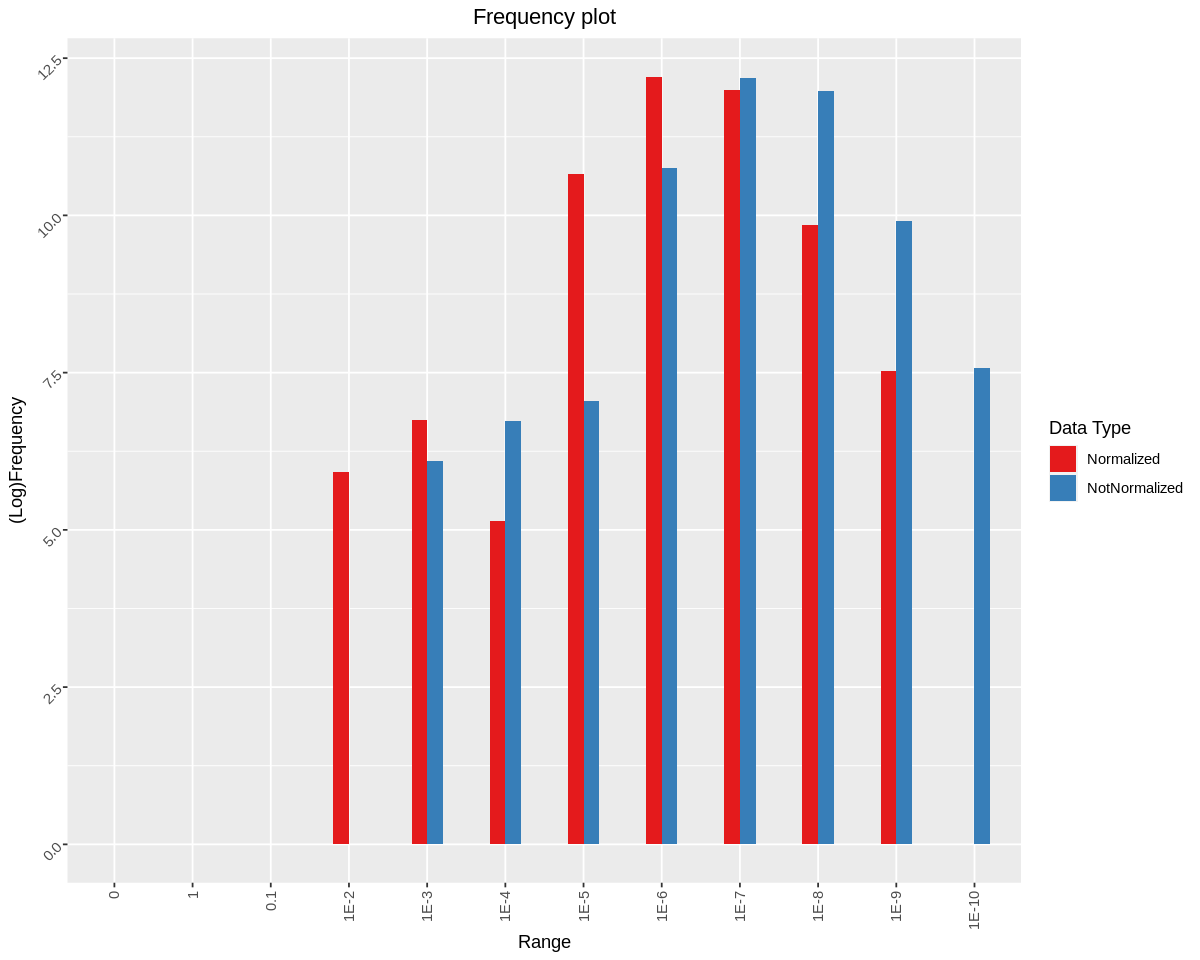

In [19]:
if(readline('Do you want to perform Imputation with minimum value of NonGapFilled table? - Y/N:')=='Y'){
    
    plot<- FrequencyPlot2(Normalized,NotNormalized)
    
    Arg1 = plot$data$Condition[1]
    Arg2 = plot$data$Condition[13]
    
    # accessing the datatable of plot and subsetting with the condition: Eliminating the Range (or bin) 0 and Ranges with zero frequencies 
    plotData_New <- subset(plot$data,plot$data$Freq!=0 & plot$data$Range_bins !=0) 
    
    #getting the first appearing value of this new plot datatable
    First_val_temp <- aggregate(plotData_New$Freq, by=list(plotData_New$Condition), FUN=first) 
    
    # Subsetting the rows in the plotData_New that has the first appearing values
    First_val <- plotData_New[plotData_New$Freq %in% c(First_val_temp$x[1],First_val_temp$x[2]),]
  
    # getting the 2nd minimum value of non-gap filled data. (The first minimum value in the data table is usually zero)
    RawLOD <- round(min(NotNormalized[NotNormalized!=min(NotNormalized)]))
    print(paste0("The minimum value greater than 0 for ",Arg1,":", round(min(Normalized[Normalized!=min(Normalized)]))))
    print(paste0("The minimum value greater than 0 for ",Arg2,":", RawLOD))
    
    Imputed2 <- Normalized
    Imputed2[Imputed2<RawLOD] <- RawLOD # Replacing values<RawLOD with RawLOD
} else return(Normalized)

ggsave(plot,filename="220725_brassimet_Roots_FrequencyPlot_Normalized.png", width = 10, height = 8)

In the following cell, we are checking once again if the rownames of our metadata is the same as the column names of our feature table. It should return **TRUE** and we are also checking the data sparsity before proceeding into any statistical tests. Data sparsity tells the amount of zeros we have in our normalized dataframe.

In [20]:
Normalized_data <- Samples

In [21]:
head(Normalized_data)

,Aviso_232_CuCl2_Block2.mzXML,Aviso_233_CuCl2_Block2.mzXML,Aviso_280_CuCl2_Block3.mzXML,Chifu_187_CuCl2_Block1.mzXML,Chifu_231_CuCl2_Block2.mzXML,Chifu_279_CuCl2_Block3.mzXML,HDEM_186_CuCl2_Block1.mzXML,HDEM_230_CuCl2_Block2.mzXML,HDEM_278_CuCl2_Block3.mzXML,PBD01_167_CuCl2_Block1.mzXML,⋯,PBD17_250_Control _Block3.mzXML,PBD18_160_Control _Block1.mzXML,PBD18_206_Control _Block2.mzXML,PBD18_251_Control _Block3.mzXML,PBD19_207_Control _Block2.mzXML,PBD19_252_Control _Block3.mzXML,PBD19_207_252_Control _Block3.mzXML,PBD20_253_Control _Block3.1.mzXML,PBD20_253_Control _Block3.2.mzXML,PBD20_253_Control _Block3.3.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2_Neg_477.065_4.52,0.3120,0.2700,0.2590,0.4220,0.3940,0.3760,0.45900,0.36800,0.3360,0.6140,⋯,0.8030,0.12100,0.3700,0.5680,0.3290,0.6610,0.4950,0.7630,0.7630,0.7630
3_Neg_112.986_0.74,0.1770,0.1580,0.1920,0.2660,0.1770,0.2110,0.31900,0.25400,0.1810,0.3640,⋯,0.3660,0.08090,0.2110,0.3040,0.1950,0.3490,0.2720,0.3670,0.3670,0.3670
4_Neg_133.014_0.71,0.1050,0.1100,0.1190,0.1020,0.1380,0.1600,0.13500,0.09830,0.1060,0.1030,⋯,0.3300,0.05040,0.1470,0.1770,0.0846,0.2290,0.1570,0.1760,0.1760,0.1760
8_Neg_420.046_2.93,0.1250,0.1430,0.1670,0.0121,0.0483,0.0561,0.09240,0.09550,0.1320,0.0365,⋯,0.3320,0.13900,0.4140,0.3140,0.1170,0.0954,0.1060,0.4330,0.4330,0.4330
9_Neg_439.085_0.68,0.0111,0.0165,0.0227,0.0149,0.0250,0.0201,0.00984,0.00719,0.0146,0.0264,⋯,0.1110,0.00695,0.0230,0.0280,0.0266,0.0562,0.0414,0.0491,0.0491,0.0491
11_Neg_174.956_0.56,0.0369,0.0382,0.0311,0.0531,0.0423,0.0436,0.05550,0.03960,0.0356,0.0776,⋯,0.0704,0.01590,0.0425,0.0536,0.0290,0.0612,0.0451,0.0888,0.0888,0.0888


# **<font color='	dodgerblue'> Multivariate analysis **<font>





1.   Hierarchical Clustering Analysis (HCA)
2.   Principal composante analysis (PCA)
3.   Principal Coordinate analysis (PCoA) 
4.   Permutational multivariate analysis of variance (PERMANOVA)
5.   Partial least squares-discriminant analysis (PLSDA)
6.   Receiver-Operating Characteristic A(ROC) analysis
7.   Discriminates analysis
8.   Volcano plot

In [ ]:
## Install require package

#install.packages("installr") 
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("ComplexHeatmap")
install.packages("devtools")
install.packages("circlize")
install.packages("tidyverse")
install.packages("dplyr")
install.packages("ggpubr")
install.packages("mvnormtest")
install.packages("vroom")
#install.packages('magick')  # there is no package called ‘magick’ R version 4.2.0
install.packages('viridis')

## 1. Hierarchical Clustering Analysis (HCA)

HCA try to create clusters of observations in data set, based on similarities of variables.

In [6]:
## Lad package
require("devtools")
require("ComplexHeatmap")
require("circlize")
require("tidyverse")
require("dplyr")
require("pheatmap")
require("ggpubr")
require("mvnormtest")
require("vroom")
#require('magick')
require('viridis')

In [21]:
dat_POS <- as.data.frame(read.csv(file = "../../../../220728_brassimet_Roots_Normalised_Quant_table.csv", row.names = 1))
metadata <- as.data.frame(read.csv(file = "../../../../Brassinet_Roots_metadata_Dec 2021.csv", row.names = 1))
metadata1 <- read.csv(file = "../../../../Brassinet_Roots_metadata_Dec 2021.csv", header=T, sep = ",", row.names = 1)

In [22]:
getwd()

[1] "/content/E:/IGEPP-UMR 1349 INRAE/BRASSIMET-project/output_data"

In [23]:
head(dat_POS)

,Aviso_232_CuCl2_Block2.mzXML,Aviso_233_CuCl2_Block2.mzXML,Aviso_280_CuCl2_Block3.mzXML,Chifu_187_CuCl2_Block1.mzXML,Chifu_231_CuCl2_Block2.mzXML,Chifu_279_CuCl2_Block3.mzXML,HDEM_186_CuCl2_Block1.mzXML,HDEM_230_CuCl2_Block2.mzXML,HDEM_278_CuCl2_Block3.mzXML,PBD01_167_CuCl2_Block1.mzXML,⋯,PBD17_250_Control._Block3.mzXML,PBD18_160_Control._Block1.mzXML,PBD18_206_Control._Block2.mzXML,PBD18_251_Control._Block3.mzXML,PBD19_207_Control._Block2.mzXML,PBD19_252_Control._Block3.mzXML,PBD19_207_252_Control._Block3.mzXML,PBD20_253_Control._Block3.1.mzXML,PBD20_253_Control._Block3.2.mzXML,PBD20_253_Control._Block3.3.mzXML
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2_Neg_477.065_4.52,0.026341490,0.029492665,0.027603399,0.039440394,0.033350152,0.041528316,0.038540680,0.040520022,0.038488058,0.042035813,⋯,0.059399332,0.021111126,0.028822807,0.057183505,0.036912326,0.056468395,0.048009006,0.061153065,0.061153065,0.061153065
3_Neg_112.986_0.74,0.014943730,0.017258671,0.020462752,0.024860532,0.014982175,0.023304454,0.026785353,0.027967624,0.020733150,0.024920254,⋯,0.027073668,0.014114794,0.016436790,0.030605256,0.021878127,0.029814629,0.026380707,0.029414384,0.029414384,0.029414384
4_Neg_133.014_0.71,0.008864925,0.012015530,0.012682643,0.009532986,0.011681018,0.017671624,0.011335494,0.010823691,0.012142066,0.007051610,⋯,0.024410684,0.008793394,0.011451223,0.017819508,0.009491741,0.019563181,0.015227099,0.014106080,0.014106080,0.014106080
8_Neg_420.046_2.93,0.010553482,0.015620189,0.017798331,0.001130874,0.004088356,0.006196113,0.007758516,0.010515386,0.015120309,0.002498872,⋯,0.024558628,0.024251624,0.032250384,0.031612008,0.013126876,0.008149902,0.010280717,0.034704164,0.034704164,0.034704164
9_Neg_439.085_0.68,0.000937149,0.001802330,0.002419294,0.001392564,0.002116126,0.002219998,0.000826232,0.000791682,0.001672398,0.001807403,⋯,0.008210867,0.001212581,0.001791688,0.002818905,0.002984401,0.004801095,0.004015299,0.003935276,0.003935276,0.003935276
11_Neg_174.956_0.56,0.003115388,0.004172666,0.003314539,0.004962760,0.003580486,0.004815517,0.004660148,0.004360307,0.004077901,0.005312669,⋯,0.005207613,0.002774107,0.003310728,0.005396190,0.003253670,0.005228239,0.004374154,0.007117159,0.007117159,0.007117159


In [24]:
head(metadata)

,ATTRIBUTE_accession,ATTRIBUTE_SampleType,ATTRIBUTE_sampleNumber,ATTRIBUTE_treatment,ATTRIBUTE_replicates,ATTRIBUTE_Condition,Accessions,Treatment,Sample_code,Aviso.H2O_CuCl2,⋯,Aviso.PBD16_CuCl2,Aviso.PBD16_H2O,Aviso.PBD17_CuCl2,Aviso.PBD17_H2O,Aviso.PBD18_CuCl2,Aviso.PBD18_H2O,Aviso.PBD19_CuCl2,Aviso.PBD19_H2O,Aviso.PBD20_CuCl2,Aviso.PBD20_H2O
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Aviso_232_CuCl2_Block2.mzXML Sample,Aviso,With_Treatment,232,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_232_CuCl2_B2,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Aviso_233_CuCl2_Block2.mzXML Sample,Aviso,With_Treatment,233,CuCl2,2,CuCl2-induced stress,Aviso,CuCl2,Aviso_233_CuCl2_B2,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Aviso_280_CuCl2_Block3.mzXML Sample,Aviso,With_Treatment,280,CuCl2,3,CuCl2-induced stress,Aviso,CuCl2,Aviso_280_CuCl2_B3,Aviso_CuCl2,⋯,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,,Aviso_CuCl2,
Chifu_187_CuCl2_Block1.mzXML Sample,Chifu,With_Treatment,187,CuCl2,1,CuCl2-induced stress,Chifu,CuCl2,Chifu_187_CuCl2_B1,,⋯,,,,,,,,,,
Chifu_231_CuCl2_Block2.mzXML Sample,Chifu,With_Treatment,231,CuCl2,2,CuCl2-induced stress,Chifu,CuCl2,Chifu_231_CuCl2_B2,,⋯,,,,,,,,,,
Chifu_279_CuCl2_Block3.mzXML Sample,Chifu,With_Treatment,279,CuCl2,3,CuCl2-induced stress,Chifu,CuCl2,Chifu_279_CuCl2_B3,,⋯,,,,,,,,,,


In [25]:
data_POS <- t(dat_POS)
data1_POS = data_POS
dim(data_POS)
#write.csv(data_POS,file='220728_brassimet_Roots_Normalised_Quant_transpose_table.csv', row.names=TRUE) 

[1]  138 3086

In [54]:
#install.packages('limma')
require('limma')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘limma’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [27]:
## Creation of object
Brassica_brassimet <- list(# Different tables
  #Height_Metabolic_Features_Deprotonated = as.matrix(data1_POS[,2:ncol(data1_POS)]),
  Height_Metabolic_Features_Protonated = as.matrix(data1_POS[,2:ncol(data1_POS)]),
  #Normalized_Metabolic_Features_Protonated = as.matrix(data1_POS[,2:ncol(data1_POS)]),
 
  # type of compounds
  Metabolic_Features = list(#Deprotonated = colnames(data1_NEG)[2:ncol(data1_NEG)],
                            Protonated = colnames(data1_POS)[2:ncol(data1_POS)]),
  # type of samples
  samples = list(name = rownames(metadata)[1:22], 
                 Replicates = metadata$ATTRIBUTE_replicates,
                 Accessions = metadata$Accessions, 
                 Treatments = metadata$Treatments,
                 Kenetics = metadata$Kinetics,
                 Samples = metadata$Samples_code,
                 Conditions = metadata$Conditions_code, 
                 
                 Aviso_H2O_CuCl2 = metadata$Aviso.H2O_CuCl2,
                 Aviso_HDEM_CuCl2 = metadata$Aviso.HDEM_CuCl2,
                 Aviso_Chifu_CuCl2 = metadata$Aviso.Chifu_CuCl2,
                 
                 Aviso_PBD01_CuCl2 = metadata$Aviso.PBD01_CuCl2,
                 Aviso_PBD02_CuCl2 = metadata$Aviso.PBD02_CuCl2,
                 Aviso_PBD03_CuCl2 = metadata$Aviso.PBD03_CuCl2,
                 Aviso_PBD04_CuCl2 = metadata$Aviso.PBD04_CuCl2,
                 Aviso_PBD05_CuCl2 = metadata$Aviso.PBD05_CuCl2,
                 Aviso_PBD06_CuCl2 = metadata$Aviso.PBD06_CuCl2,
                 Aviso_PBD07_CuCl2 = metadata$Aviso.PBD07_CuCl2,
                 Aviso_PBD08_CuCl2 = metadata$Aviso.PBD08_CuCl2,
                 Aviso_PBD09_CuCl2 = metadata$Aviso.PBD09_CuCl2,
                 Aviso_PBD10_CuCl2 = metadata$Aviso.PBD10_CuCl2,
                 Aviso_PBD11_CuCl2 = metadata$Aviso.PBD11_CuCl2,
                 Aviso_PBD12_CuCl2 = metadata$Aviso.PBD12_CuCl2,
                 Aviso_PBD13_CuCl2 = metadata$Aviso.PBD13_CuCl2,
                 Aviso_PBD14_CuCl2 = metadata$Aviso.PBD14_CuCl2,
                 Aviso_PBD15_CuCl2 = metadata$Aviso.PBD15_CuCl2,
                 Aviso_PBD16_CuCl2 = metadata$Aviso.PBD16_CuCl2,
                 Aviso_PBD17_CuCl2 = metadata$Aviso.PBD17_CuCl2,
                 Aviso_PBD18_CuCl2 = metadata$Aviso.PBD18_CuCl2,
                 Aviso_PBD19_CuCl2 = metadata$Aviso.PBD19_CuCl2,
                 Aviso_PBD20_CuCl2 = metadata$Aviso.PBD20_CuCl2
  )
)


In [28]:
help(mean)
#MEAN = mean(Brassica_brassimet$samples$Replicates

In [ ]:
set.seed(405)
#?Heatmap
ht_opt(
  legend_title_gp = gpar(fontsize = 12, fontface = "bold"), 
  legend_labels_gp = gpar(fontsize = 12, fontface = "bold"), 
  heatmap_column_names_gp = gpar(fontsize = 12, fontface = "bold"))


COL = c('Aviso'='#a9a9a9','HDEM'='#000000','Chifu'='#000075', 
            'PBD01'='#e6194b','PBD02'='#3cb44b','PBD03'='#ffe119','PBD04'='#4363d8','PBD05'='#f58231', 
            'PBD06'='#911eb4','PBD07'='#46f0f0','PBD08'='#f032e6','PBD09'='#bcf60c','PBD10'='#fabebe',
            'PBD11'='#008080','PBD12'='#e6beff','PBD13'='#9a6324','PBD14'='#fffac8','PBD15'='#800000', 
            'PBD16'='#aaffc3','PBD17'='#808000','PBD18'='#ffd8b1','PBD19'='#808080','PBD20'='#ffffff')


png("220728_brassimet_roots Heatmap features Protonated data Imputed and Normalized.png", width=10,height=10,units="in",res=1200)
## HETAMAP OF PROTONATED FEATURES       
ha2 = Heatmap(scale(Brassica_brassimet$Height_Metabolic_Features_Protonated[1:22,1:length(Brassica_brassimet$Metabolic_Features$Protonated)]), name="Z-score [M+H]+",
              row_km = 2,
              column_km = 3,
              row_gap = unit(c(1, 1), "mm"), border = TRUE,
              cluster_rows = FALSE,
              cluster_columns = TRUE,
              clustering_distance_columns = function(x) as.dist(1 - cor(t(x))),
              clustering_method_columns = 'ward.D2',
              #col = c("navy", "blue","red"),
              #clustering_method_rows = 'ward.D2',
              show_row_names = TRUE,
              show_column_names = FALSE,
              column_title =  "Metabolic features (m/z [M+H]+)",
              #column_title =  "Protonated metabolic features (m/z [M+H]+)",
              column_title_gp = gpar(fontsize = 20, fontface = "bold"),
              row_title_gp = gpar(fontsize = 20, fontface = "bold"),
              
              row_title =  "Brassica accessions",
              #left_annotation = rowAnnotation(" " = Brassica_phytochemistry$samples$species, col = list(speies = c( "blue", "yellow", "red"))),
              #left_annotation = rowAnnotation(" " = Brassica_phytochemistry$samples$species), # " " for empty name
              use_raster = F,
              #col = colorRamp2(quantile(m1, seq(0, 1, by = 0.25)), viridis(5)),

              col = colorRamp2(c(-3, 0, 3), c("#09eff9", '#eeeeee', "red")), # POSIIVE MODE
)
ha2 + Heatmap(Brassica_brassimet$samples$Accessions, name = "Accessions", col = COL, width = unit(5, "mm")) +
  Heatmap(Brassica_brassimet$samples$Treatments, name = "Treatments", col =  c("blue1","red"), width = unit(5, "mm"))
dev.off()

#ha2 + Heatmap(Brassica_brassimet$samples$Accessions, name = "Accessions", col = c('#a9a9a9','#000000','#000075','#e6194b','#3cb44b','#ffe119','#4363d8','#f58231','#911eb4','#46f0f0','#f032e6','#bcf60c','#fabebe','#008080','#e6beff','#9a6324','#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1','#808080','#ffffff'), width = unit(8, "mm")) +
#  Heatmap(Brassica_brassimet$samples$Treatments, name = "Treatments", col =  c("blue1","red"), width = unit(8, "mm")) +
#  Heatmap(Brassica_brassimet$samples$Kenetics, name = "Kinetics", col = c('#009E73', "gray"), width = unit(8, "mm"))


In [ ]:
head(PCoA_plot)

## Volcano plots

A volcano plot is a type of scatter plot represents differential expression of features (genes for example): on the x-axis we typically find the fold change and on the y-axis the p-value.

In [ ]:
# Download the data we will use for plotting
download.file("https://raw.githubusercontent.com/biocorecrg/CRG_RIntroduction/master/de_df_for_volcano.rds", "de_df_for_volcano.rds", method="curl")

# The RDS format is used to save a single R object to a file, and to restore it.
# Extract that object in the current session:
tmp <- readRDS("de_df_for_volcano.rds")

# remove rows that contain NA values
de <- tmp[complete.cases(tmp), ]

In [ ]:
head(tmp)

At the end of a clustering analysis, it is relatively common to plot our clusters and data points onto a 2D map as well. Yet, we need an additional analysis (for example a PCA) to compute those dimensions.

## 2. Principal composante analysis (PCA)

The difference is that PCA focuses on shared variance: it tries to summarize multiple variables in the minimum number of components so that each component explains the most variance.

## 3.   Principal Coordinate analysis (PCoA) 

Like HCA, PCoA try to create clusters of observations in data set, based on (dis)similarities of variables. 
